**Illegal Dump Sites**

When we look to find desirable neighborhoods, cleanliness is a huge factor. Nobody wants to live somewhere dirty, and this is especially problematic when trash is in places where it should not be. Illegal dump sites are the epitome of what makes a neighborhood "dirty", and can significantly drag down perspective and experiences with neighborhoods. 

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

dumps = pd.read_csv("illegaldumpsites.csv")

dumps.head()

,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,NaN,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,NaN,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958,NaN
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912,NaN


We initially considered the amount of illegal dump sites in each neighborhood, as this could be viewed as a frequency which would impact the chances of somebody encountering an illegal dump when they are in a certain neighborhood.

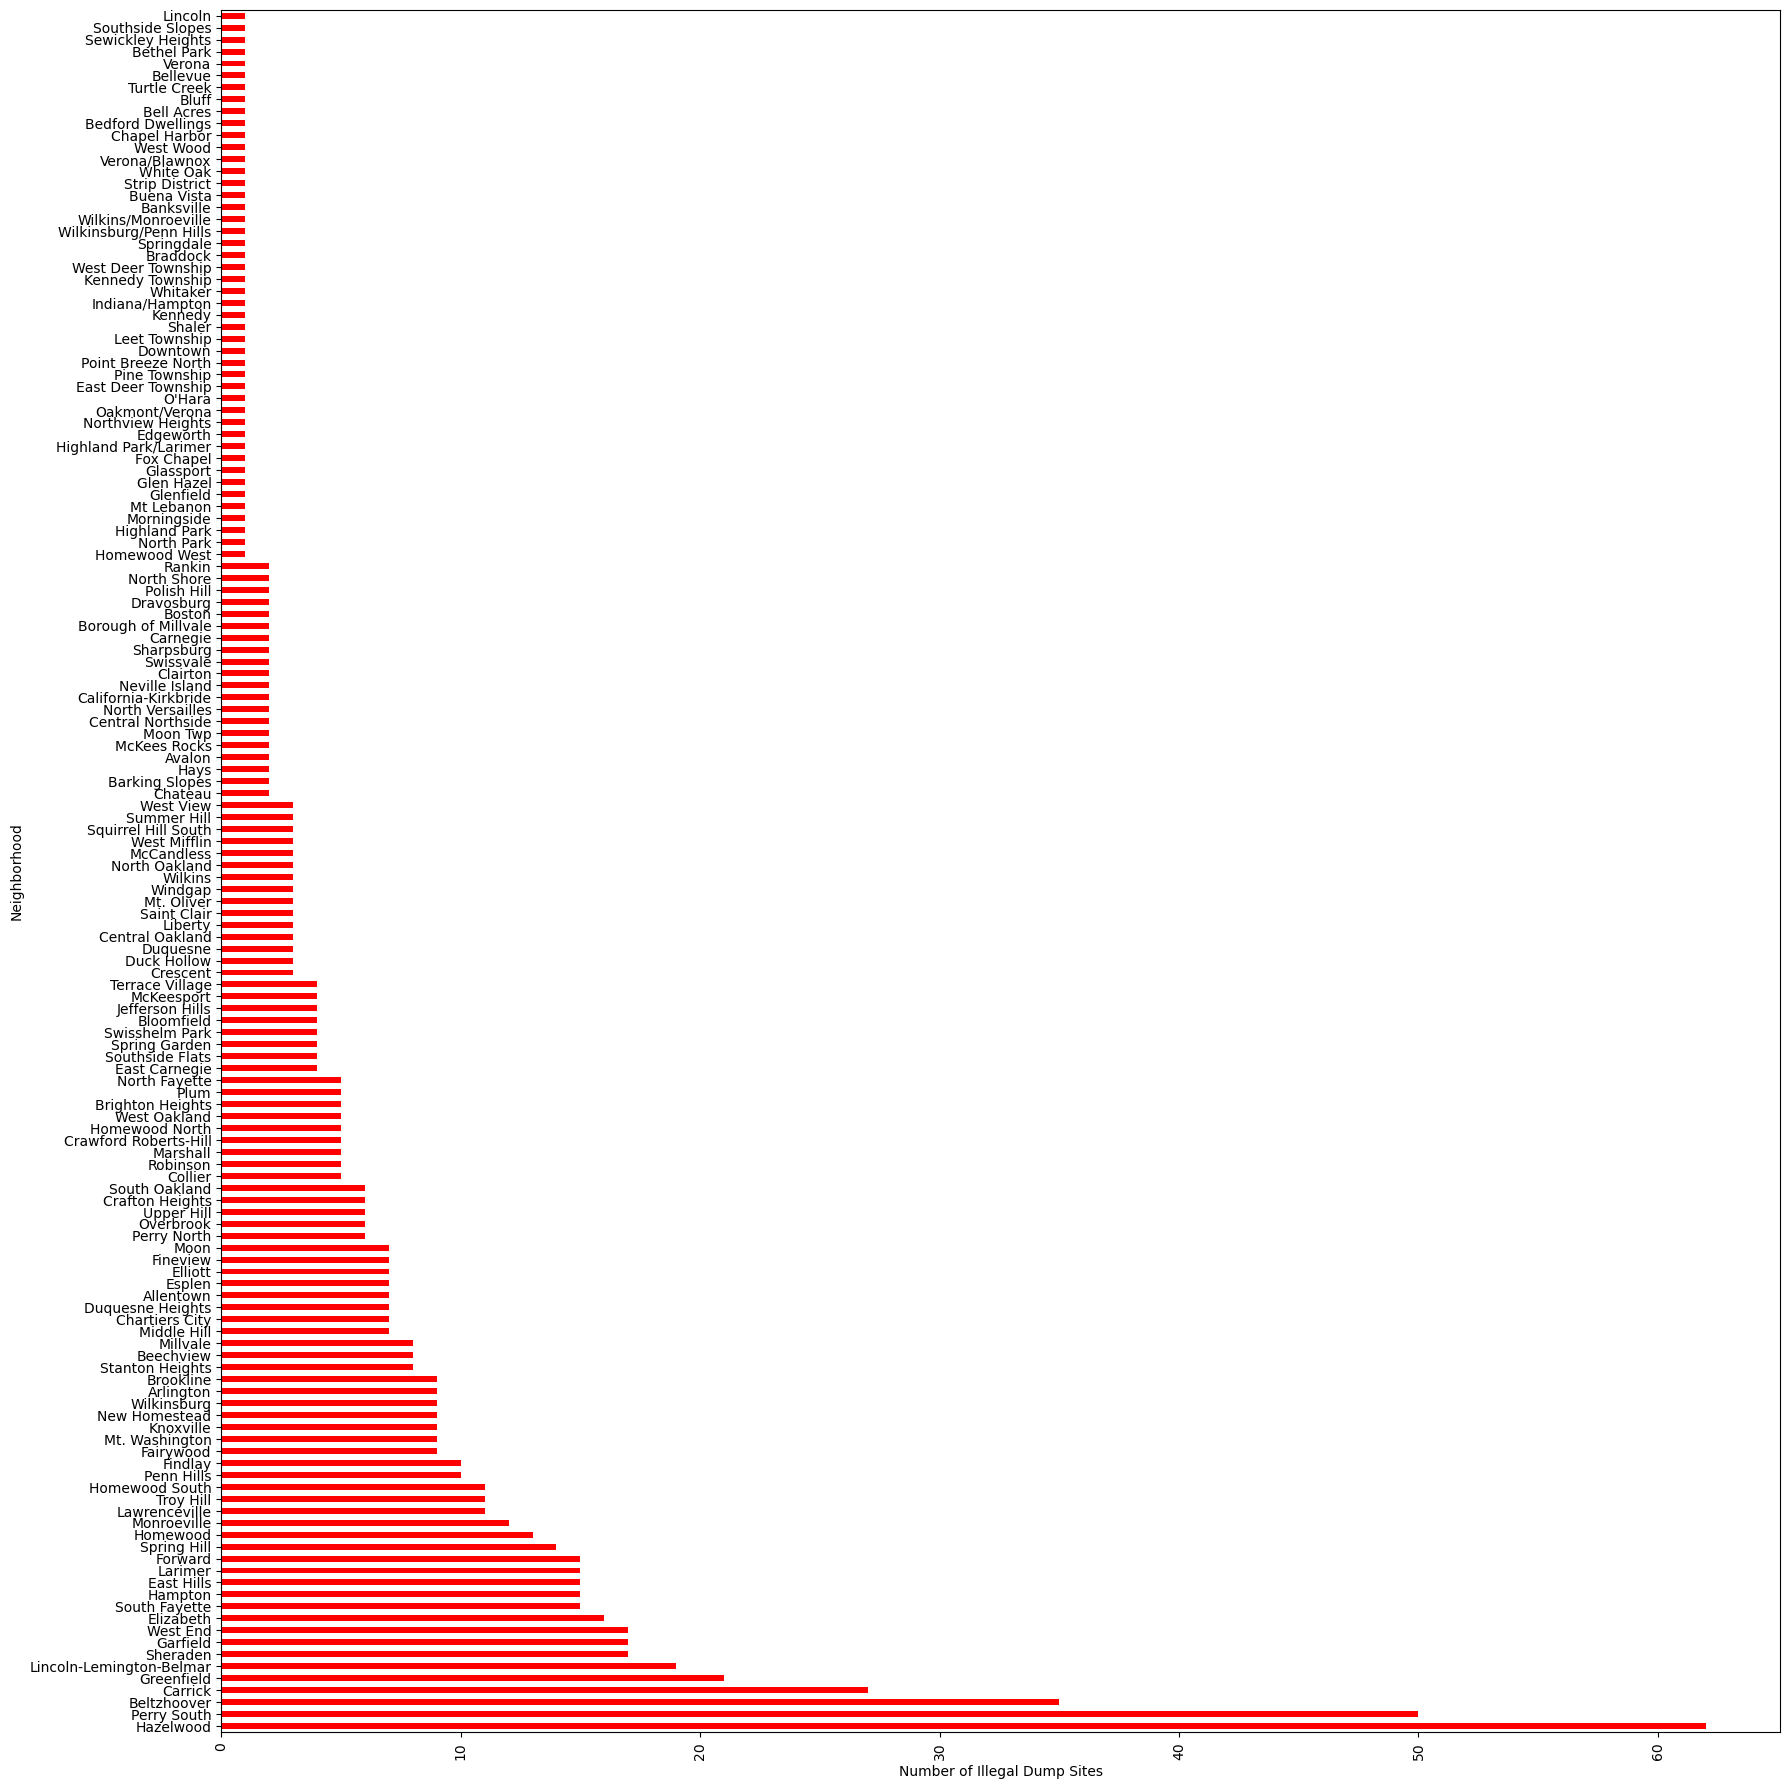

In [301]:
dumps['estimated_tons'] = pd.to_numeric(dumps['estimated_tons'], errors='coerce')
query_mask = dumps['estimated_tons'] > 0
illegal_dumps = dumps[query_mask]
neighborhood_counts = illegal_dumps['Neighborhood'].value_counts()
neighborhood_counts = neighborhood_counts.sort_values(ascending=False)
plt.figure(figsize=(18,18))
neighborhood_counts.plot(kind='barh', color='red')
plt.xlabel('Number of Illegal Dump Sites')
plt.ylabel('Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

There are clearly large disparities between the amount of illegal dump sites in each neighborhood, but most of the neighborhoods with the fewest illegal dump sites had similar numbers of illegal dump sites. To find differences between these, we can look into the amount of trash that was actually estimated to exist in these illegal dump sites.

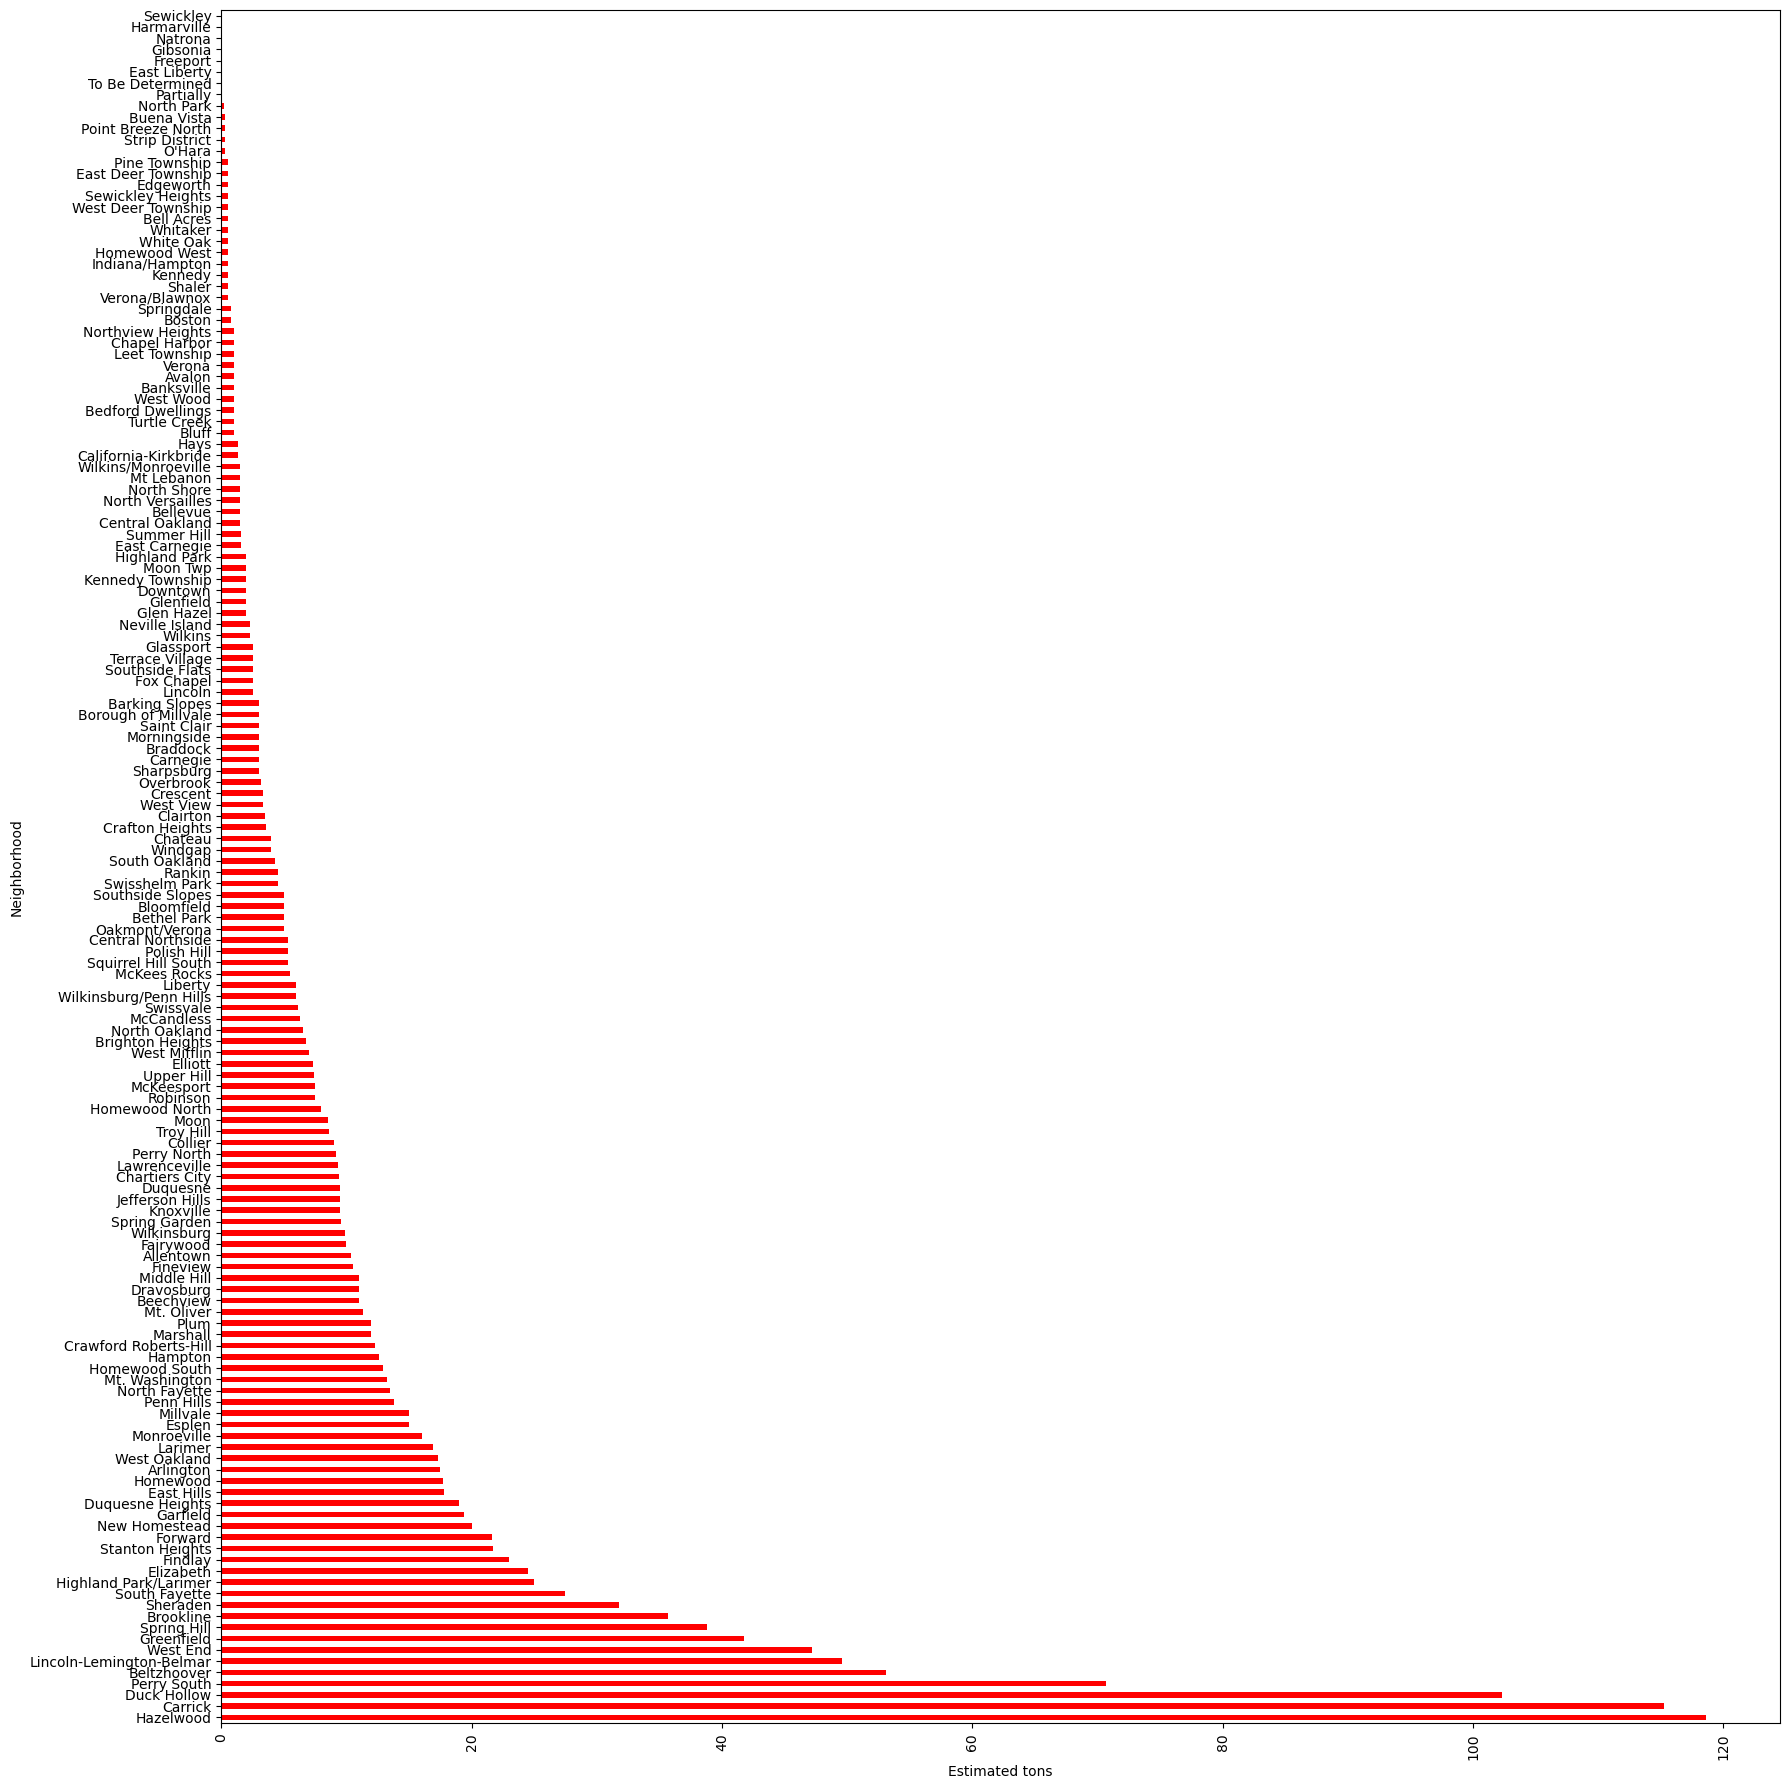

In [303]:
weights = dumps.groupby('Neighborhood')['estimated_tons'].sum()
weights = weights.sort_values(ascending=False)
plt.figure(figsize=(18,18))
weights.plot(kind='barh', color='red')
plt.xlabel('Estimated tons')
plt.ylabel('Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

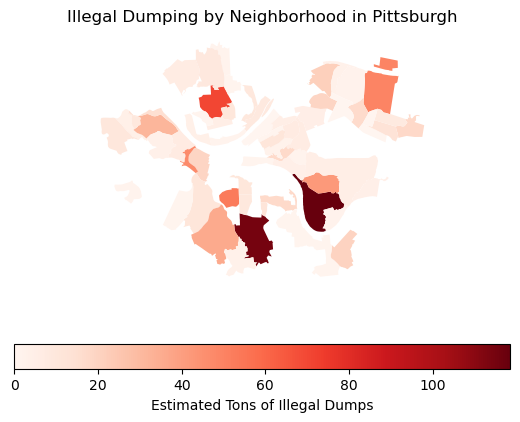

In [305]:
neighborhoods = gpd.read_file("Neighborhoods_.shp")

dumps_map = neighborhoods.merge(weights, how='left', left_on='hood', right_on='Neighborhood')

dumps_map.plot(column='estimated_tons', cmap='Reds', legend=True, 
         legend_kwds={'label': "Estimated Tons of Illegal Dumps",
                      'orientation': "horizontal"})
plt.title("Illegal Dumping by Neighborhood in Pittsburgh")
plt.axis('off')
plt.show()

**Conclusion**

After analyzing this data, it is clear that there are some neighborhoods which clearly experience far more illegal dumping than others. One might be inspired to move to neighborhoods like East Liberty, and persuaded against neighborhoods experiencing high amounts of illegal dumping, like Hazelwood.